# King County House Price Prediction with Random Forest


## Data Acquisition 

In [1]:
# Load Modules 
import pandas as pd
import sklearn.ensemble
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Load Data
dat = pd.read_csv('kc_house_data.csv')

print('The dimesion of the data set is: ', dat.shape)

The dimesion of the data set is:  (21613, 21)


In [3]:
dat.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
# Looking for nulls
print(dat.isnull().any())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


Data is clean 

In [6]:
# Remove ID 
dat = dat.drop(columns='id', axis=1)

In [7]:
# Convert date to date object
dat.date = pd.to_datetime(dat.date)

In [8]:
dat.zipcode = dat.zipcode.astype('category')

In [9]:
# Calculate the age of the house when sold 
dat['age'] = dat['date'].dt.year - dat.yr_built


In [10]:
dat.age[dat.age < 0] = 0 # force that age to be greater or equal to 0 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
dat['quarter'] = dat['date'].dt.quarter

In [12]:
dat.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated           lat  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258     47.560053   
std      828.090978     442.575043     29.373411    401.679240      0.138564   
min      290.000000       0.000000   1900.000000      0.000000     47.155900   
25%     1190.000000       0.000000   1951.000000      0.000000     47.471000   
50%     1560.000000       0.000000   1975.000000      0.000000     47.571800   
75%     2210.000000     560.000000   1997.000000      0.000000     47.678000   
max     9410.000000    4820.000000   2015.000000   2015.000000     47.777600   

               long  sqft_living15     sqft_lot15           age       quarter  
count  21613.000000   21613.000000   21613.000000  21613.000000  21613.000000  
mean    -122.213896    1986.552492   12768.455652     43.318373      2.524777  
std        0.140828     685.391304   27304.179631     29.374665      1.034210  
min     -122.519000     399.000000     651.000000      0.000000      1.000000  
25%     -122.328000    1490.000000    5100.000000     18.000000      2.000000  
50%     -122.230000    1840.000000    7620.000000     40.000000      2.000000  
75%     -122.125000    2360.000000   10083.000000     63.000000      3.000000  
max     -121.315000    6210.000000  871200.000000    115.000000      4.000000

### Univariate EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000254B8982EB8>,
      dtype=object)

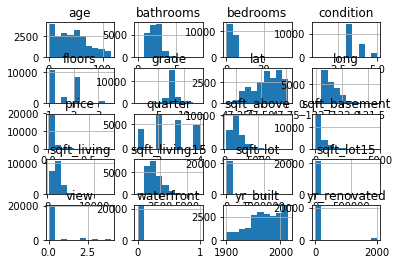

In [13]:
pd.DataFrame.hist(dat)

+ Housing price is skewed as expected
+ Number of bedroom and bathroom are skewed 
+ size are skewed as well 

### Multivariate EDA

#### Coefficient

In [14]:
# drop date 
dat = dat.drop(columns='date', axis = 1)

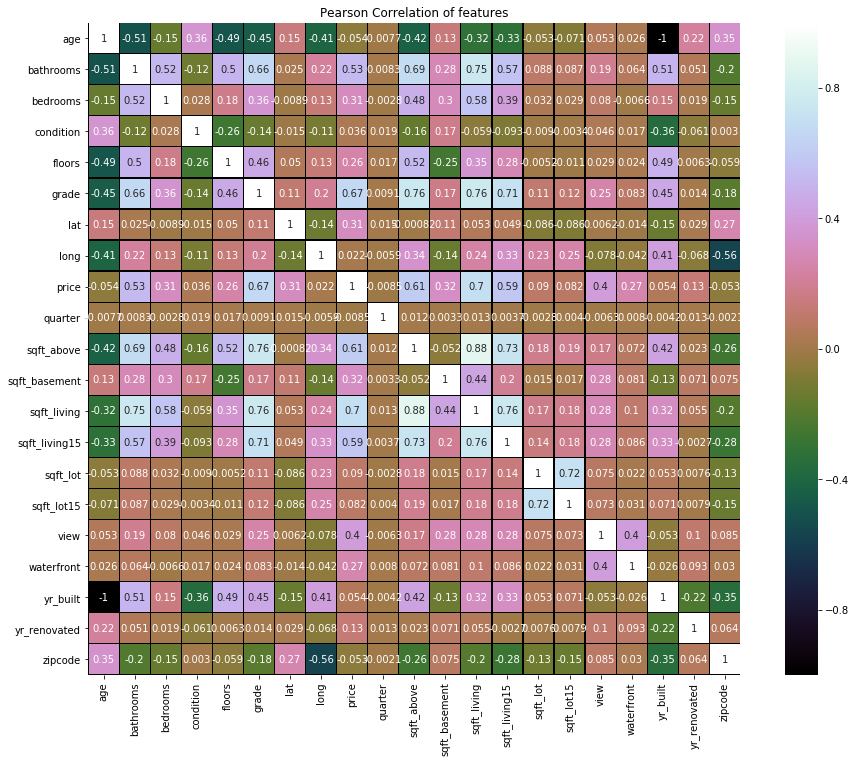

In [15]:
str_list = [] # empty list to contain columns with strings (words)

for colname, colvalue in dat.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = dat.columns.difference(str_list) 
# Create Dataframe containing only numerical features
dat_num = dat[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(dat_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

+ Correlation between sqft_lot and sqft_lot15 is high; same as sqft_living and 15 data, drop off the 15 data 
+ year_built can be dropped off as well since we have age data 

In [16]:
dat = dat.drop(columns=['sqft_lot15', 'sqft_living15', 'yr_built', 'yr_renovated', 'lat', 'long'], axis=1)

In [17]:
# Conver zip code to city

#import sys
#!{sys.executable} -m pip install uszipcode
# search = ZipcodeSearchEngine()

# These packages were working at all

#### One-Hot Encoding for zip code 

In [18]:
dat.zipcode = dat.zipcode.astype('category') 

zipcode = pd.get_dummies(dat['zipcode'])

dat = dat.drop(columns='zipcode', axis = 1)

dat = pd.concat([dat, zipcode], axis=1)

In [19]:
dat.columns

Index([        'price',      'bedrooms',     'bathrooms',   'sqft_living',
            'sqft_lot',        'floors',    'waterfront',          'view',
           'condition',         'grade',    'sqft_above', 'sqft_basement',
                 'age',       'quarter',           98001,           98002,
                 98003,           98004,           98005,           98006,
                 98007,           98008,           98010,           98011,
                 98014,           98019,           98022,           98023,
                 98024,           98027,           98028,           98029,
                 98030,           98031,           98032,           98033,
                 98034,           98038,           98039,           98040,
                 98042,           98045,           98052,           98053,
                 98055,           98056,           98058,           98059,
                 98065,           98070,           98072,           98074,
                 98075,  

### Train and Validate the Random Forest Model

#### Create Training and Testing set

In [21]:
# Labels are the values we want to predict
labels = dat['price']

# Remove the labels from the dataset
dat = dat.drop(columns='price', axis =1)

# Saving feature names for later use
features = list(dat.columns)

In [22]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(dat, labels, test_size=0.2, random_state=8504)

In [23]:
print('Training Data Shape:', train_data.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Data Shape:', test_data.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Data Shape: (17290, 83)
Training Labels Shape: (17290,)
Testing Data Shape: (4323, 83)
Testing Labels Shape: (4323,)


In [24]:
# Instantiate Regression Forest model with 800 decision trees 
rf = sklearn.ensemble.RandomForestRegressor(n_estimators=800)

In [25]:
# Train the model on training data
rf.fit(train_data, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### Generate Predictions

In [26]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_data)

#### Dianogstic

<function matplotlib.pyplot.show(*args, **kw)>

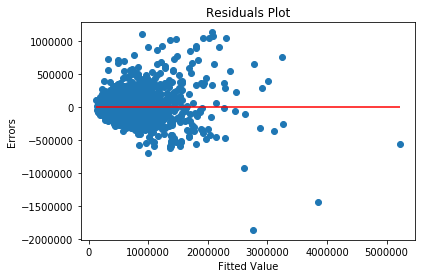

In [27]:
error = test_labels - predictions

plt.scatter(x = predictions, y = error)
plt.hlines(y = 0, xmin=min(predictions), xmax= max(predictions), color='red')
plt.title('Residuals Plot')
plt.xlabel('Fitted Value')
plt.ylabel('Errors')
plt.show

+ Residuals are randomly distributed round 0
+ Large error issue. This could be caused by outliers, such as the house with 33 bedroom

In [54]:
print('The R-square is: ', round(rf.score(train_data, train_labels),4) * 100, '%')

The R-square is:  97.67 %


In [31]:
print('Random Forest RMSE:', round(np.mean(error ** 2)**0.5,2))

# Print out the mean absolute error (mae)
abe = abs(error)
print('Mean Absolute Error:', round(np.mean(abe), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (abe / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Random Forest RMSE: 142074.77
Mean Absolute Error: 82453.14 degrees.
Accuracy: 84.17 %.


+ The R-square is so high, but the RMSE seems large
+ Whether this model is a good model? 

#### Find the Variable Importances

In [37]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(dat, round(importance, 2)) for dat, importance in zip(features, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
fimp = pd.DataFrame(feature_importances, columns=['Feature', 'Importance'])
fimp[fimp.Importance > 0]

Feature  Importance
0           grade        0.34
1     sqft_living        0.29
2             age        0.08
3        sqft_lot        0.04
4      waterfront        0.03
5           98004        0.03
6            view        0.02
7      sqft_above        0.02
8        bedrooms        0.01
9       bathrooms        0.01
10  sqft_basement        0.01
11        quarter        0.01
12          98033        0.01
13          98039        0.01
14          98040        0.01
15          98112        0.01

+ Grade is the most influential feature on housing price, following by the area of living room, age of the house, area of lot, etc. 
+ Zip Code 98004, which is downtown Bellevue has huge influence on housing price compare with other area. 


#### Vizualize  

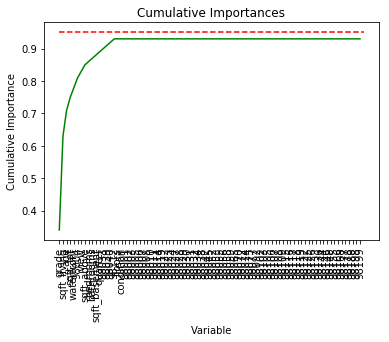

In [39]:

# list of x locations for plotting
x_values = list(range(len(importances)))

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

### Apply Local Interpretable Model-Agnostic Explainability (LIME) to explain the local prediction 

In [40]:
# Pre-process 
# Extract varible names
feature_names = list(train_data.columns)

# Identify the category variable
cat_feature = train_data.iloc[:, 13:]

# Extract category variable names
cat_names = list(cat_feature.columns)

#### Define and Run LIME Model 

In [45]:
import lime
import lime.lime_tabular

In [47]:
explainer = lime.lime_tabular.LimeTabularExplainer(train_data.values, feature_names= feature_names, class_names=['price'], categorical_features=cat_feature, categorical_names=cat_names, verbose=True, mode='regression')

In [48]:
# Instead of change pd. Dataframe to np.array, using .values
# Reset Indexes

test_data = test_data.reset_index(drop = True)
test_labels = test_labels.reset_index(drop=True)

#### Display sample local explainers

In [49]:
i = 20
exp = explainer.explain_instance(test_data.iloc[i,:].values, rf.predict, num_features=10)

Intercept 1890497.7151036859
Prediction_local [664798.63442392]
Right: 696770.53125


In [51]:
print('Actual Value: ', test_labels[i])

Actual:  650000.0


+ The intercept for the local linear regression is 1,890,497.72
+ The local prediction is 664,798.63
+ The Random Forest Prediction is 696,770.53
+ The Actual value is 650,000

+ For the lime summary table below:
    + Left is the range of local prediction
    + Middle is the list of coefficients / values for each feature
    + Right is the actual value of the sample observation

In [50]:
exp.show_in_notebook(show_table=True)

For this instance, the random forest model doesn't make much sense. The model only take one continous variable, which is square feet of living room, but other variables are dummies. The Random Forest is basically saying that, if the house are not in these rich neighborhood and do not nearby the waterfront that the housing price will decrease, but a large area of living room increase its value. 

Take a look at another example. 

In [57]:
i = 100
exp = explainer.explain_instance(test_data.iloc[i,:].values, rf.predict, num_features=10)

Intercept 1433312.0934986037
Prediction_local [950855.63454548]
Right: 729992.43


In [58]:
print('Actual Value: ', test_labels[i])

Actual Value:  711000.0


In [59]:
exp.show_in_notebook(show_table=True)

In [60]:
i = 2500
exp = explainer.explain_instance(test_data.iloc[i,:].values, rf.predict, num_features=10)

Intercept 1645200.9510056793
Prediction_local [540154.95645583]
Right: 541806.63875


In [61]:
print('Actual Value: ', test_labels[i])

Actual Value:  610000.0


In [62]:
exp.show_in_notebook(show_table=True)

+ The local prediction model does not comply with the Random Forest model. From these 3 example, neighborhood seems to have a huge influence on housing price. But this is not something indicated by the Random Forest Model. According to the random forest model, grade should have the most importance. 
+ The random forest model is hard to explain in the local level. 
+ Thus, even though random forest has a good prediction, it's not the best to apply in real world due to low explanability. 